# Let's build an End to End ML project with Python and Streamlit


# Steps to be followed
Our diabetes prediction system will involve below major 6 steps.

**1. Understanding Business Problem and getting data**

**2. Visualizing the data**

**3. Feature Engineering**

**4. Training Models**

**5. Deploying Model with Streamlit**


## Understanding Business Problem and Getting Data

Our Business Problem belongs to Medical Science domain i.e. *predicting if a patient is diabetic or not*. According to CDC, more than 34 million people in the United States itself have diabetes, and 1 in 5 of them don’t know they have it. This fact in itself is more than sufficient to build a production level system which can help actual patients who might be having Diabetes and not knowing it. So let’s clearly state our objective.

We’ve stated our problem which we need to keep in mind for our entire project lifecycle. Now the main challenge is to get the data. In real life scenario, to get the data for our business problem is the real challenge. This alone might consume a lot of time in your project. Sometimes there is actually no data for you to start with and sometimes it is so messy that you’ll be dedicating 80% of project time to clean your data (`Feature Engineering`) .

Fortunately, the dataset required for our problem is available on Kaggle. Dataset name is **Pima Indians Diabetes Database** collected from from the National Institute of Diabetes and Digestive and Kidney Disease. This dataset is small with `9` features and `768` observations which is enough to show how can we solve this problem.

It is very important to know about each and every feature in your data. Consult the domain specialist if required to know about all the features . This will make Feature Engineering step easier and less time consuming. Here’s a brief description of all the features which I’m referring from data source itself for you to follow along.
1. : Pregnancies: Number of times pregnant
2. : Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. : BloodPressure: Diastolic blood pressure (`mm Hg`)
4. : SkinThickness: Triceps skin fold thickness (`mm`)
5. : Insulin: 2-Hour serum insulin (`mu U/ml`)
6. : BMI: Body mass index (`weight in kg/(height in m)²`)
7. : DiabetesPedigreeFunction: Diabetes pedigree function
8. : Age: Age (`years`)
9. : Outcome: Class variable (`0 or 1`), 268 of 768 are 1, the others are 0.




We start by importing `opendatasets` module to get the data from Kaggle.

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/uciml/pima-indians-diabetes-database')

100%|██████████| 8.91k/8.91k [00:00<00:00, 1.47MB/s]

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

We read the data from `csv` file into `pandas DataFrame`.

In [ ]:
df = pd.read_csv('/content/pima-indians-diabetes-database/diabetes.csv')

In [ ]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Visualizing the data
Visualizing the data gives the information about distribution of the data and relation between different variables and target column. Let's plot some figures inorder to get a better overview of the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Freq/Dist')

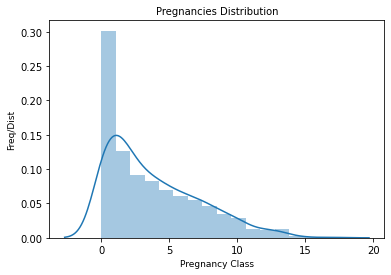

In [ ]:
plt = sns.distplot(df['Pregnancies'])
plt.set_title('Pregnancies Distribution', fontdict={'fontsize':10})
plt.set_xlabel('Pregnancy Class', fontdict={'fontsize':9})
plt.set_ylabel('Freq/Dist', fontdict={'fontsize':9})
# we have right skewed plot for pregnancy

In [ ]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

**17 Pregnancies looks like an outlier**

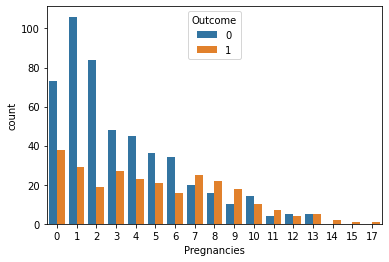

In [ ]:
sns.countplot(x='Pregnancies', data=df, hue='Outcome')

In [ ]:
# defining a function for our plot1 which we will use for our other variables as well
# this plot is for distribution of the variable
def plot1(data):
  plt1 = sns.distplot(data)
  plt1.set_title(data.name +'Distribution', fontdict={'fontsize':11})
  plt1.set_xlabel(data.name +'Class', fontdict={'fontsize':9})
  plt1.set_ylabel('Count/Dist.', fontdict={'fontsize':9})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


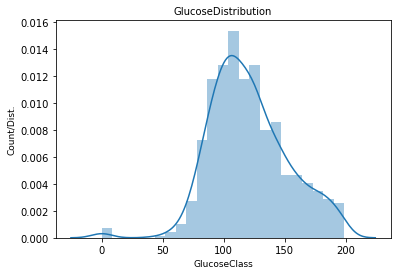

In [ ]:
plot1(df['Glucose'])

In [ ]:
# plot to compare distribution of a variable with diabetic or non-diabetic
def plot2(df, var):
  plt2 = sns.distplot(df[df.Outcome==False][var.name], color='green', label='Non-diabetic')
  sns.distplot(df[df.Outcome==True][var.name], color='red', label='Diabetic')
  plt2.set_title('Distribution of ' + var.name, fontdict={'fontsize':11})
  plt2.set_xlabel(var.name, fontdict={'fontsize':9})
  plt2.set_ylabel('Count/Dist.', fontdict={'fontsize':9})
  plt2.axes.legend(loc=0)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


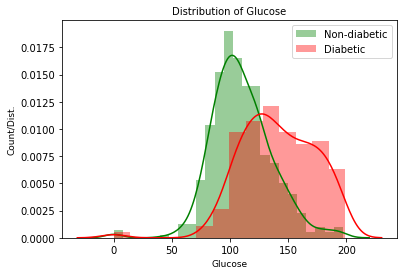

In [ ]:
plot2(df, df['Glucose'])
# clearly diabetic and non-diabetic patient's glucose level are overlapping
# between 90-120 approx

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


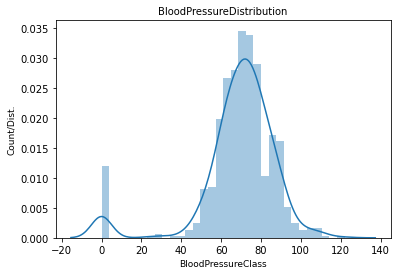

In [ ]:
plot1(df['BloodPressure'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


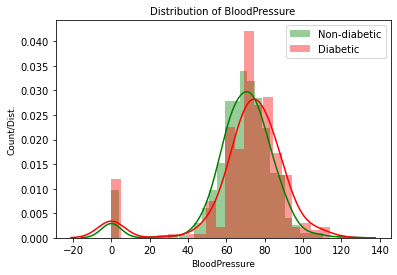

In [ ]:
plot2(df, df['BloodPressure'])
# that's almost complete ovelapping

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


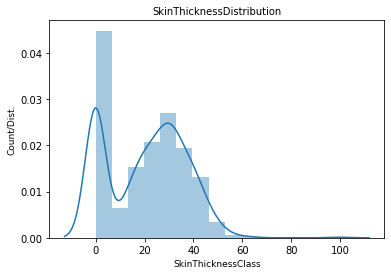

In [ ]:
plot1(df.SkinThickness)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


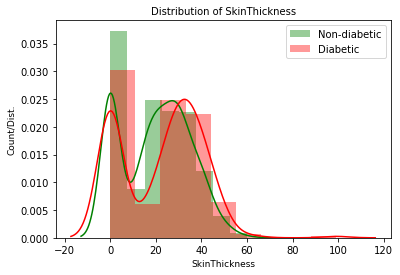

In [ ]:
plot2(df, df.SkinThickness)
# here also we have an overlapping

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


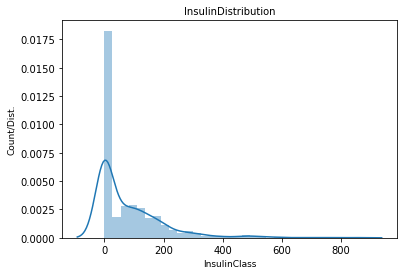

In [ ]:
plot1(df.Insulin)
# Insulin follows almost power law distribution
# maximum values are 0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


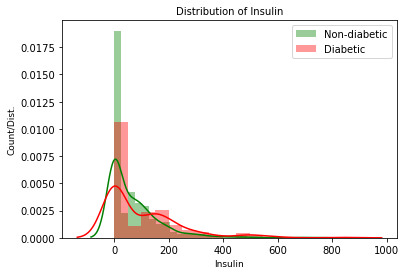

In [ ]:
plot2(df, df.Insulin)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


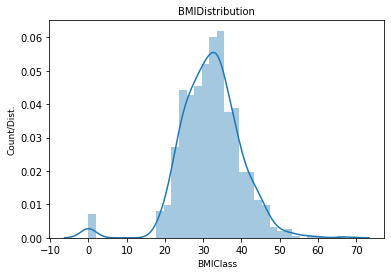

In [ ]:
plot1(df.BMI)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


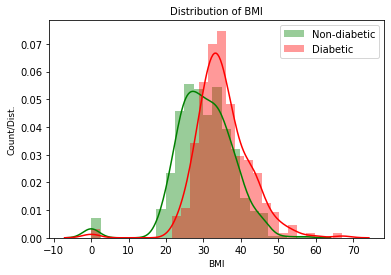

In [ ]:
plot2(df, df.BMI)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


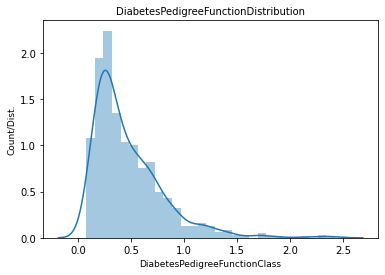

In [ ]:
plot1(df.DiabetesPedigreeFunction)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


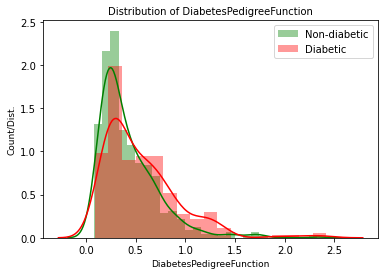

In [ ]:
plot2(df, df.DiabetesPedigreeFunction)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


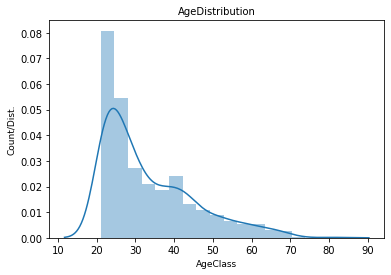

In [ ]:
plot1(df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


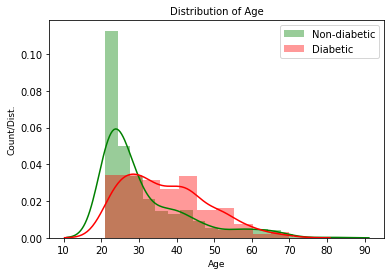

In [ ]:
plot2(df, df.Age)
# this can be a good observation
# people between 40-50 are more prone to diabetes as total number of people in that age group are less
# non-diabetic

### Co-relation

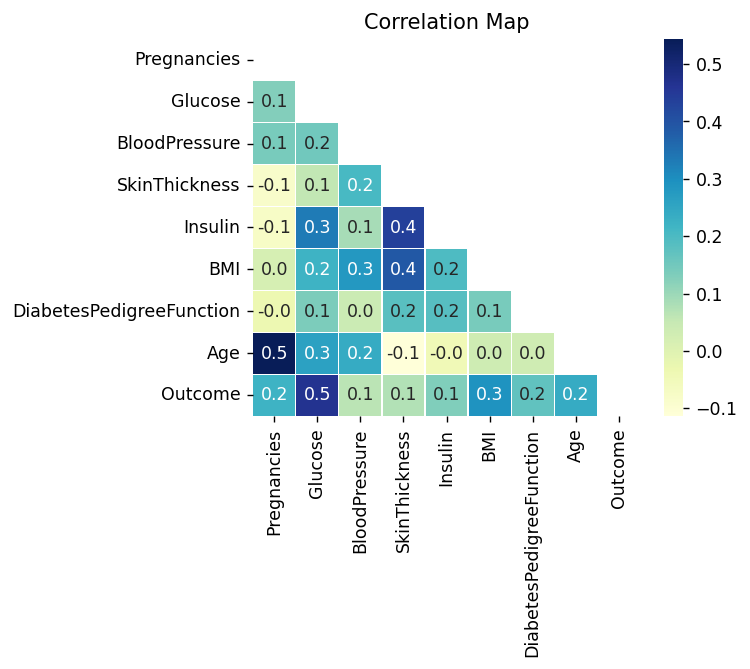

In [ ]:
plt.figure(dpi = 125, figsize=(5,4))
mask = np.triu(df.corr())
# np.triu returns lower triangle for our heatmap as we donot need upper map
sns.heatmap(df.corr(), mask=mask, fmt=".1f", annot=True, lw=0.1, cmap='YlGnBu')
plt.title('Correlation Map')
plt.show()
# considering outcome variable, skinthickness and insulin are least correlated
# other variables are also not much correlated
# one thing that we can make through this is that, we cannot linealy separate our data

## Feature Engineering
Here, we are going to tweak our features alittle bit. We will see if there are any null values and, if there are any then, remove them. Also we are going to normalize our data before we feed it into the model so the training of model doesnot take longer time.

In [ ]:
# set seed for reproducibility
Seed = 20
np.random.seed(Seed)

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
print('Total zero Glucose values: ' + str(768-df['Glucose'].astype(bool).sum(axis=0)))
print('Total 0 BP values:' + str(768-df['BloodPressure'].astype(bool).sum(axis=0)))
print('Total 0 skinthickness values:' + str(768-df['SkinThickness'].astype(bool).sum(axis=0)))
print('Total 0 Insulin values:' + str(768-df['Insulin'].astype(bool).sum(axis=0)))
print('Total 0 DiabetesPedig.. values:' + str(768-df['DiabetesPedigreeFunction'].astype(bool).sum(axis=0)))
print('Total 0 age values:' + str(768-df['Age'].astype(bool).sum(axis=0)))


Total zero Glucose values: 5
Total 0 BP values:35
Total 0 skinthickness values:227
Total 0 Insulin values:374
Total 0 DiabetesPedig.. values:0
Total 0 age values:0


In [ ]:
def replace_zero(df):
  df_nan = df.copy(deep=True)
  cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
  df_nan[cols] = df_nan[cols].replace({0:np.nan})
  return df_nan

df_nan = replace_zero(df)

In [ ]:
df_nan.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df_nan.isnull().values.any()

True

There are multiple strategies to handle Null values. There is simple `mean`, `median` or `mode` replacement methods that you can use which is standard approach. Amongst these, median replacement is a better approach as 1 outlier can significantly impact mean value whereas `median` is more robust in these situation.

In our scenario, `median` replacement seemed to be an ideal case. Almost all variables had few missing values and median value was used.

In [ ]:
def find_median(df, var):
  temp = df[df[var].notnull()]
  temp = df[[var, 'Outcome']].groupby('Outcome')[[var]].median().reset_index()
  return temp

# replacing null values
def replace_null(df, var):
  median_df = find_median(df, var)
  var0 = median_df[var].iloc[0]
  var1 = median_df[var].iloc[1]
  df.loc[(df['Outcome']==0) & (df[var].isnull()), var] = var0
  df.loc[(df['Outcome']==1) & (df[var].isnull()), var] = var1
  return df[var].isnull().sum()

In [ ]:
print(str(replace_null(df_nan, 'Glucose'))+ ' Nulls for Glucose')
print(str(replace_null(df_nan, 'SkinThickness'))+ ' Nulls for SkinThickness')
print(str(replace_null(df_nan, 'Insulin'))+ ' Nulls for Insulin')
print(str(replace_null(df_nan, 'BMI'))+ ' Nulls for BMI')
print(str(replace_null(df_nan, 'BloodPressure'))+ ' Nulls for BloodPressure')

0 Nulls for Glucose
0 Nulls for SkinThickness
0 Nulls for Insulin
0 Nulls for BMI
0 Nulls for BloodPressure


### Normalizing the data

In [ ]:
# we need to scale our data uniformly
from sklearn.preprocessing import StandardScaler

def std_scalar(df):
  std_X = StandardScaler()
  x = pd.DataFrame(std_X.fit_transform(df.drop(['Outcome'], axis=1)),
                    columns=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age',
                              'DiabetesPedigreeFuntion', 'Age'])
  y = df['Outcome']
  return x,y

In [ ]:
X,Y = std_scalar(df_nan)
X.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,DiabetesPedigreeFuntion,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,1.604619e-16,-3.685926e-16,-3.928426e-17,-8.601337e-18,1.054567e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.551447e+00,-3.999727e+00,-2.486187e+00,-1.434747e+00,-2.070186e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.202356e-01,-6.934382e-01,-4.603073e-01,-4.408430e-01,-7.176590e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.536274e-01,-3.218035e-02,-1.226607e-01,-4.408430e-01,-5.593870e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.100618e-01,6.290775e-01,3.275348e-01,3.116039e-01,6.057816e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.539814e+00,4.100681e+00,7.868309e+00,7.909072e+00,5.041489e+00,5.883565e+00,4.063716e+00


In [ ]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Training models
We will train few machine learning models and compare the metrics of each model and dump the best model into `.pkl` file.

### Training and testing data
We need training data inorder to train the model and testing data to see how the model is performing on the data which it has not seen before. The model's performance on training and testing data indicates whether the model is generalizing well or not.

We will be using `train_test_split` function from `sklearn.model_selection` to split our data into training and testing data.

In [ ]:
# keep train size as 0.8
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=20, stratify=Y)

### KNN Model

In [ ]:
# we are good to go with baseline model
#KNN
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []
for i in range(5,15):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, Y_train)
  train_scores.append(neigh.score(X_train, Y_train))
  test_scores.append(neigh.score(X_test, Y_test))

In [ ]:
print('Max train_score is ' + str(max(train_scores)*100) + 'for k = ' +
       str(train_scores.index(max(train_scores))+5))

Max train_score is 85.66775244299674for k = 5


In [ ]:
print('Max test_score is ' + str(max(test_scores)*100) + 'for k = '+
       str(test_scores.index(max(test_scores)) +5 ))

Max test_score is 87.01298701298701for k = 13


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=20, penalty='l2').fit(X_train, Y_train)
log_pred = LogisticRegression(X_test)
log_model.score(X_test, Y_test)

0.8311688311688312

### SVM (Support Vector Machine) Model

In [ ]:
from sklearn import svm

svm_model = svm.SVC().fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)
svm_model.score(X_test, Y_test)

0.8896103896103896

In [ ]:
# function to evaluate model performance
def model_perf(pred, Y_test):
  cmp_list=[]
  for i,j in zip(pred, Y_test):
    if i==j:
      cmp_list.append(1)
    else:
      cmp_list.append(0)
  return cmp_list

In [ ]:
cmp_list = model_perf(svm_pred, Y_test)

In [ ]:
print('Model accuracy confirmation: ' + str(cmp_list.count(1)/len(Y_test)))

Model accuracy confirmation: 0.8896103896103896


### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=2, random_state=20).fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
rf_model.score(X_test, Y_test)

0.8571428571428571

### Sequential Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[len(X_train.keys())]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model

In [ ]:
neural_model = build_model()

In [ ]:
neural_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# keeping epochs high as dataset is small
EPOCHS = 1000
neural_pred = neural_model.fit(X_train, Y_train, epochs=EPOCHS, validation_split=0.1, verbose=2)

Epoch 1/1000
18/18 - 2s - loss: 0.5912 - accuracy: 0.6449 - val_loss: 0.3947 - val_accuracy: 0.7419 - 2s/epoch - 97ms/step
Epoch 2/1000
18/18 - 0s - loss: 0.4966 - accuracy: 0.6413 - val_loss: 0.3470 - val_accuracy: 0.8548 - 75ms/epoch - 4ms/step
Epoch 3/1000
18/18 - 0s - loss: 0.4667 - accuracy: 0.8080 - val_loss: 0.3443 - val_accuracy: 0.8387 - 90ms/epoch - 5ms/step
Epoch 4/1000
18/18 - 0s - loss: 0.4461 - accuracy: 0.8116 - val_loss: 0.3349 - val_accuracy: 0.8387 - 76ms/epoch - 4ms/step
Epoch 5/1000
18/18 - 0s - loss: 0.4277 - accuracy: 0.8188 - val_loss: 0.3169 - val_accuracy: 0.8548 - 92ms/epoch - 5ms/step
Epoch 6/1000
18/18 - 0s - loss: 0.4129 - accuracy: 0.8170 - val_loss: 0.3049 - val_accuracy: 0.8548 - 108ms/epoch - 6ms/step
Epoch 7/1000
18/18 - 0s - loss: 0.4014 - accuracy: 0.8388 - val_loss: 0.2874 - val_accuracy: 0.8548 - 73ms/epoch - 4ms/step
Epoch 8/1000
18/18 - 0s - loss: 0.3842 - accuracy: 0.8478 - val_loss: 0.2760 - val_accuracy: 0.8710 - 76ms/epoch - 4ms/step
Epoch 9/

In [ ]:
# let's measure final performance
hist = pd.DataFrame(neural_pred.history)
hist['epoch'] = neural_pred.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
995,0.221778,0.909420,0.726970,0.903226,995
996,0.217992,0.911232,0.944136,0.887097,996
997,0.213928,0.913043,0.942018,0.903226,997
998,0.212059,0.914855,0.960243,0.903226,998
999,0.211318,0.914855,0.947673,0.887097,999


In [ ]:
neural_test = neural_model.predict(X_test)

In [ ]:
neural_test_converted = []
for i in neural_test:
  if i > 0.5:
    neural_test_converted.append(1)
  else:
    neural_test_converted.append(0)

In [ ]:
cmp_list = model_perf(neural_test_converted, Y_test)


In [ ]:
print('Test accuracy: ' + str(cmp_list.count(1)/len(Y_test)*100))

Test accuracy: 83.11688311688312


### Dumping the best `SVM` model using `pickle` 

In [ ]:
import pickle
# dump our SVM model
pickle.dump(svm_model, open('svm_model.pkl', 'wb'))

## Deploying Model Using Streamlit

In [ ]:
!pip install streamlit

     |████████████████████████████████| 9.7 MB 4.2 MB/s 
     |████████████████████████████████| 76 kB 5.0 MB/s 
     |████████████████████████████████| 164 kB 62.1 MB/s 
     |████████████████████████████████| 181 kB 56.0 MB/s 
     |████████████████████████████████| 4.3 MB 39.6 MB/s 
     |████████████████████████████████| 111 kB 35.2 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 128 kB 57.3 MB/s 
     |████████████████████████████████| 792 kB 51.2 MB/s 
     |████████████████████████████████| 380 kB 69.1 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=8758b020d4b40afcb08fbd86a5ab19fa328c8f3550f177e3a4c0b3494626a09a
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      S

We will write our interactive web application to `app.py` file and run it. It gives the `url` to a local host web application where users can input their test values and get prediction.

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

std_X = StandardScaler()
pickled_model = pickle.load(open('svm_model.pkl', 'rb'))
st.title('Diabetes Detection System')
st.markdown (
    """
    <style>
    [data-testid='stSidebar'][aria-expanded='true'] > div:first-child{
       width:350px
    }
    [data-testid='stSidebar'][aria-expanded='true'] > div:first-child{
       width:350px
       margin-left: -350px
    }
    </style>


    """,
    unsafe_allow_html=True
)
pregnancies = st.number_input('Pregnancies')
glucose = st.number_input('Glucose')
bloodpressure = st.number_input('BloodPressure')
skinthickness = st.number_input('SkinThickness')
insulin = st.number_input('Insulin')
BMI = st.number_input('BMI')
diabetespf = st.number_input('Diabetes Pedigree Function')
age = st.number_input('Age')

submitted = st.button('Submit')
if submitted:

  df = pd.DataFrame({
      'Pregnancies': [pregnancies],
       'Glucose': [glucose],
        'BloodPressure': [bloodpressure],
         'SkinThickness': [skinthickness],
          'Insulin': [insulin],
           'BMI': [BMI],
            'DiabetesPedigreeFunction': [diabetespf],
             'Age': [age]})
  
  x = pd.DataFrame(std_X.fit_transform(df))
  prediction = pickled_model.predict(x)
  if prediction > 0.5:
    st.write('You are diabetic')
  else:
    st.write('You are non-diabetic')









Overwriting app.py


# Running our app on `colab`
The `app.py` file returns a local host web application which we can run on our local browser. Inorder to share the web app with our friends, we will run the `app.py` file through `localtunnel`.

In [ ]:
# run streamlit using `localtunnel`
!streamlit run app.py & npx localtunnel --port 8501